**loading data**

In [75]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [76]:
df=pd.read_csv("/content/data/daily-min-temperatures.csv",header=0,parse_dates=[0])

In [77]:
df.head()

,Date,Temp
0,1981-01-01,20.7
1,1981-01-02,17.9
2,1981-01-03,18.8
3,1981-01-04,14.6
4,1981-01-05,15.8


**applied to only series without trend and seasonality
means first remove trend and seasonality if it is present**

In [78]:
train=df.Temp[:df.shape[0]-7]


In [79]:
test=df.Temp[df.shape[0]-7:]

In [80]:
train.head()

,Temp
0,20.7
1,17.9
2,18.8
3,14.6
4,15.8


In [81]:
test.head()

,Temp
3643,12.9
3644,14.6
3645,14.0
3646,13.6
3647,13.5


In [82]:
from statsmodels.tsa.ar_model import AutoReg

In [83]:
from statsmodels.tsa.ar_model import ar_select_order

In [84]:
data = train.copy()
predictions = []

for t in test:
    # set maxlag

    maxlag = int(len(data) ** 0.5)   # square root of n
    if maxlag < 1:
        maxlag = 1



    sel = ar_select_order(data, maxlag=maxlag, ic='aic')
    best_lag = sel.ar_lags[-1]   # chosen lag

    # fit model with best lag
    model = AutoReg(data, lags=best_lag, old_names=False)
    model_fit = model.fit()

    #  forecast
    y = model_fit.predict(start=len(data), end=len(data)+len(test)-1)
    predictions.append(y.iloc[0])

    # update training data with actual observation
    data = pd.concat([data, pd.Series([t])], ignore_index=True)




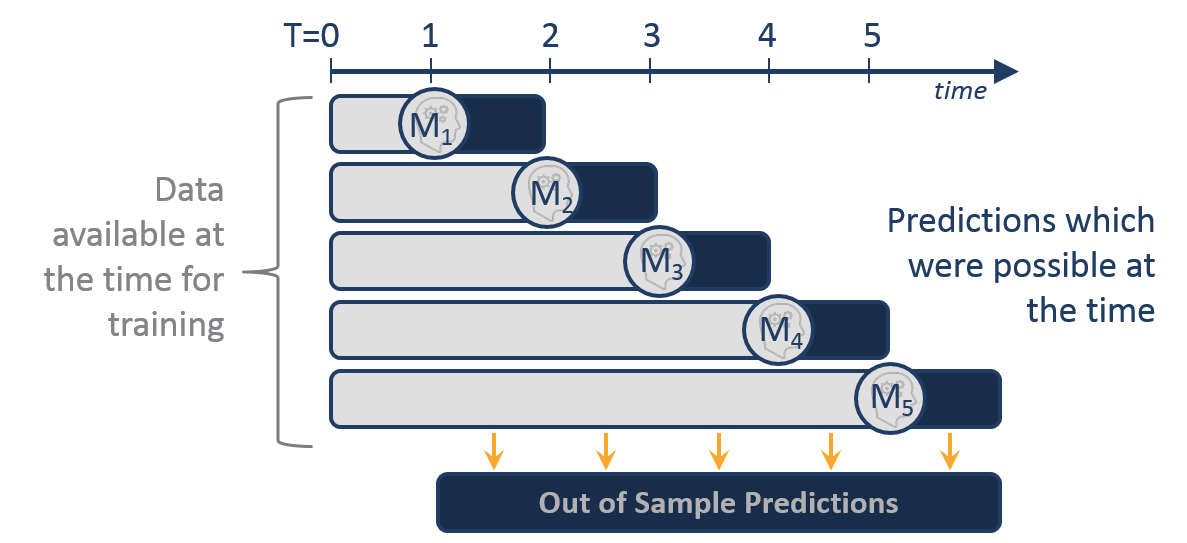

In [85]:
best_lag


21

In [86]:
predictions

[np.float64(11.908816394063095),
 np.float64(13.738247171368325),
 np.float64(14.409290373405822),
 np.float64(13.496580831109313),
 np.float64(13.320598050832196),
 np.float64(13.333859342571392),
 np.float64(14.457430441746109)]

In [87]:
test

,Temp
3643,12.9
3644,14.6
3645,14.0
3646,13.6
3647,13.5
3648,15.7
3649,13.0


In [88]:
from sklearn.metrics import mean_squared_error
mse=mean_squared_error(test.values,predictions)
mse

1.3797410250313773

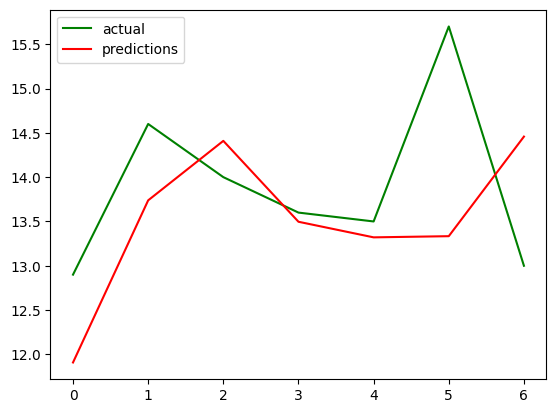

In [89]:
import matplotlib.pyplot as plt
plt.plot(test.values,color="green",label="actual")
plt.plot(predictions,color="red",label="predictions")
plt.legend()
plt.show()

In [90]:
import sys
import numpy
import pandas
import matplotlib
import sklearn
import statsmodels
print("python:",sys.version)
print("numpy:", numpy.__version__)
print("pandas:", pandas.__version__)
print("matplotlib" ,matplotlib.__version__ )
print("scikit-learn:", sklearn.__version__)
print("statsmodels:", statsmodels.__version__)


python: 3.12.11 (main, Jun  4 2025, 08:56:18) [GCC 11.4.0]
numpy: 2.0.2
pandas: 2.2.2
matplotlib 3.10.0
scikit-learn: 1.6.1
statsmodels: 0.14.5
